In [1]:
from ROOT import TFile,TTree
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.misc import factorial

In [10]:
######################
#subDir = "summaryClus"
subDir = "summaryMerge/"
DataFilePath = "/home/jcordero/CMS/BRIL/data/"+subDir

Key = {"Residuals":['ResidualsX',
                     'ResidualsY',
                     'ResidualsR'],
       "perModule":["Number of Clusters per module per event", 
                     "Number of Hits per module per event"],
       "Clusters":["Number of clusters for Disk -4",
                    "Number of clusters for Disk -3",
                    "Number of clusters for Disk -2",
                    "Number of clusters for Disk -1",
                    "Number of clusters for Disk 1",
                    "Number of clusters for Disk 2",
                    "Number of clusters for Disk 3",
                    "Number of clusters for Disk 4",
                    "RVsZ",
                    "XVsY"],
       "Hits":["Number of hits for Disk -4",
                "Number of hits for Disk -3",
                "Number of hits for Disk -2",
                "Number of hits for Disk -1",
                "Number of hits for Disk 1",
                "Number of hits for Disk 2",
                "Number of hits for Disk 3",
                "Number of hits for Disk 4",
                "RVsZ",
                "XVsY"],
       "2xCoincidences":["Number of 2x Coincidences for Disk -4",
                          "Number of 2x Coincidences for Disk -3",
                          "Number of 2x Coincidences for Disk -2",
                          "Number of 2x Coincidences for Disk -1",
                          "Number of 2x Coincidences for Disk 1",
                          "Number of 2x Coincidences for Disk 2",
                          "Number of 2x Coincidences for Disk 3",
                          "Number of 2x Coincidences for Disk 4",
                          "Number of real 2x Coincidences for Disk -4",
                          "Number of real 2x Coincidences for Disk -3",
                          "Number of real 2x Coincidences for Disk -2",
                          "Number of real 2x Coincidences for Disk -1",
                          "Number of real 2x Coincidences for Disk 1",
                          "Number of real 2x Coincidences for Disk 2",
                          "Number of real 2x Coincidences for Disk 3",
                          "Number of real 2x Coincidences for Disk 4",
                          "RVsZ",
                          "XVsY"],
       "3xCoincidences":["Number of 3x Coincidences for Disk -4",
                          "Number of 3x Coincidences for Disk -3",
                          "Number of 3x Coincidences for Disk -2",
                          "Number of 3x Coincidences for Disk -1",
                          "Number of 3x Coincidences for Disk 1",
                          "Number of 3x Coincidences for Disk 2",
                          "Number of 3x Coincidences for Disk 3",
                          "Number of 3x Coincidences for Disk 4",
                          "Number of real 3x Coincidences for Disk -4",
                          "Number of real 3x Coincidences for Disk -3",
                          "Number of real 3x Coincidences for Disk -2",
                          "Number of real 3x Coincidences for Disk -1",
                          "Number of real 3x Coincidences for Disk 1",
                          "Number of real 3x Coincidences for Disk 2",
                          "Number of real 3x Coincidences for Disk 3",
                          "Number of real 3x Coincidences for Disk 4",
                          "RVsZ",
                          "XVsY"],
    }

######################
#file = TFile(DataFilePath+"summary_runSim.root")
PU = ['1','5','10','20','60']
means = {str(pu):{} for pu in PU}


In [14]:
PU_var = '1'
file = TFile(DataFilePath+"summary_PU_"+PU_var+".root")

In [16]:
Tree = {}
hists = {}
data = {}
for k in Key:
    hists[k],data[k] = {},{}
    Tree[k] = file.Get("BRIL_IT_Analysis/"+k)
    for inK in Key[k]:
        print('--'+k+'  '+inK)
        hists[k][inK] = Tree[k].Get(inK)
        data[k][inK] = []
        for h in hists[k][inK]:
            data[k][inK].append(h)


      

--Residuals  ResidualsX
--Residuals  ResidualsY
--Residuals  ResidualsR
--perModule  Number of Clusters per module per event
--perModule  Number of Hits per module per event
--Clusters  Number of clusters for Disk -4
--Clusters  Number of clusters for Disk -3
--Clusters  Number of clusters for Disk -2
--Clusters  Number of clusters for Disk -1
--Clusters  Number of clusters for Disk 1
--Clusters  Number of clusters for Disk 2
--Clusters  Number of clusters for Disk 3
--Clusters  Number of clusters for Disk 4
--Clusters  RVsZ
--Clusters  XVsY
--Hits  Number of hits for Disk -4
--Hits  Number of hits for Disk -3
--Hits  Number of hits for Disk -2
--Hits  Number of hits for Disk -1
--Hits  Number of hits for Disk 1
--Hits  Number of hits for Disk 2
--Hits  Number of hits for Disk 3
--Hits  Number of hits for Disk 4
--Hits  RVsZ
--Hits  XVsY
--2xCoincidences  Number of 2x Coincidences for Disk -4
--2xCoincidences  Number of 2x Coincidences for Disk -3
--2xCoincidences  Number of 2x Coincid

In [17]:
N = {}
N['min'] = {'RVsZ_py':100,
            'RVsZ_px':340,
            'Number of clusters for Disk -4_py':0,
            'Number of clusters for Disk -4_px':0,
           }
N['max'] = {'RVsZ_py':520,
            'RVsZ_px':365,
            'Number of clusters for Disk -4_py':150,
            'Number of clusters for Disk -4_px':10,
           }

In [18]:
def poiss(k, *param):
    return param[1]*(param[0]**k/factorial(k)) * np.exp(-param[0])

def CB(x,*params):
    x = x+0j 
    N, a, n, xb, sig = params
    if a < 0:
        a = -a
    if n < 0:
        n = -n
    aa = abs(a)
    A = (n/aa)**n * np.exp(- aa**2 / 2)
    B = n/aa - aa
    total = 0.*x
    total += ((x-xb)/sig  > -a) * N * np.exp(- (x-xb)**2/(2.*sig**2))
    total += ((x-xb)/sig <= -a) * N * A * (B - (x-xb)/sig)**(-n)
    try:
        return total.real
    except:
        return totat
    return total

In [19]:
var = 'Clusters'


DiskRing = {'plus' :{},
            'minus':{},
            'both' :{},
           }
diskNum = 5
ringNum = 6

disks = DiskRing.keys()
disk = ['Disk'+str(i) for i in range(1,diskNum)]
ring = ['Ring'+str(i) for i in range(1,ringNum)]


colors = ['magenta','deepskyblue','limegreen','orange','teal']
colorsP = ['magenta','deepskyblue','limegreen','orange','teal']
colorsM = ['r','b','g','y','cyan']

In [20]:
xlim = {}
xlim['1'] = 30 
xlim['5'] = 150 
xlim['10'] = 250 
xlim['20'] = 350 
xlim['60'] = 800 

bound = ([0,-10000,-10000,0,-10000],[10000,10000,10000,10000,10000])
############# FIT ##############
f = CB
P0 = {}
##         N, a, n, xb, sig = params
P0['1']  = [ 5,1,10, 0,  5]
P0['5']  = [10,1,10,10, 20]
P0['10'] = [20,1,20,20, 40]
P0['20'] = [70,1,30,70,100]
P0['60'] = [90,1,40,90,200]

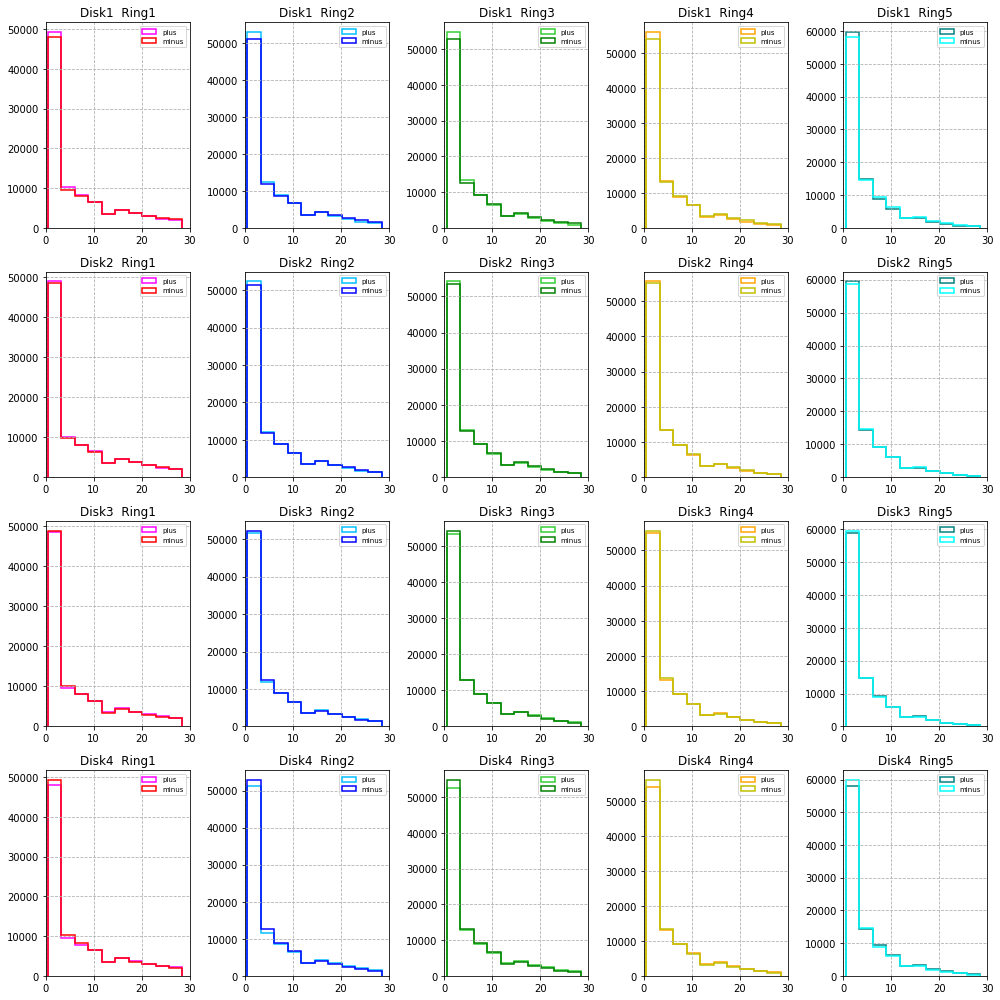

In [21]:
plt.figure(figsize=(14,14))
for i in range(1,diskNum):
    for d in disks: DiskRing[d]['Disk'+str(i)] = {} 

    for j in range(1,ringNum):
        for d in disks: DiskRing[d]['Disk'+str(i)]['Ring'+str(j)] = []
        
        yplus  = [hists[var]['Number of clusters for Disk ' +str(i)].GetBinContent(j,ii) for ii in range(xlim[PU_var])]
        yminus = [hists[var]['Number of clusters for Disk -'+str(i)].GetBinContent(j,ii) for ii in range(xlim[PU_var])]
        y = [p+m for p,m in zip(yplus,yminus)]
        x = [hists[var]['Number of clusters for Disk -'+str(i)].ProjectionY().GetBinCenter(jj) for jj in range(xlim[PU_var])]
        for k in range(len(y)):
            for N in range(int(yplus[k])):
                DiskRing['plus']['Disk'+str(i)]['Ring'+str(j)].append(x[k])
            for N in range(int(yminus[k])):
                DiskRing['minus']['Disk'+str(i)]['Ring'+str(j)].append(x[k])
            for N in range(int(y[k])):
                DiskRing['both']['Disk'+str(i)]['Ring'+str(j)].append(x[k])

        plt.subplot(diskNum-1,ringNum-1,diskNum*(i-1)+j)
        plt.hist(DiskRing['plus']['Disk'+str(i)]['Ring'+str(j)],
                histtype = 'step',
                linewidth = 1.5,
                color = colorsP[j-1],
                label = 'plus',
                )
        plt.hist(DiskRing['minus']['Disk'+str(i)]['Ring'+str(j)],
                histtype = 'step',
                linewidth = 1.5,
                color = colorsM[j-1],
                label = 'minus'
                )
        plt.legend(prop = {'size':7})
        plt.grid(linestyle='--')
        ax = plt.gca()
        ax.set_xlim(0,xlim[PU_var])
        #ax.set_ylim(0,70)
        plt.title('Disk' + str(i) + '  Ring' + str(j))
plt.tight_layout()        

/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/home/jcordero/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


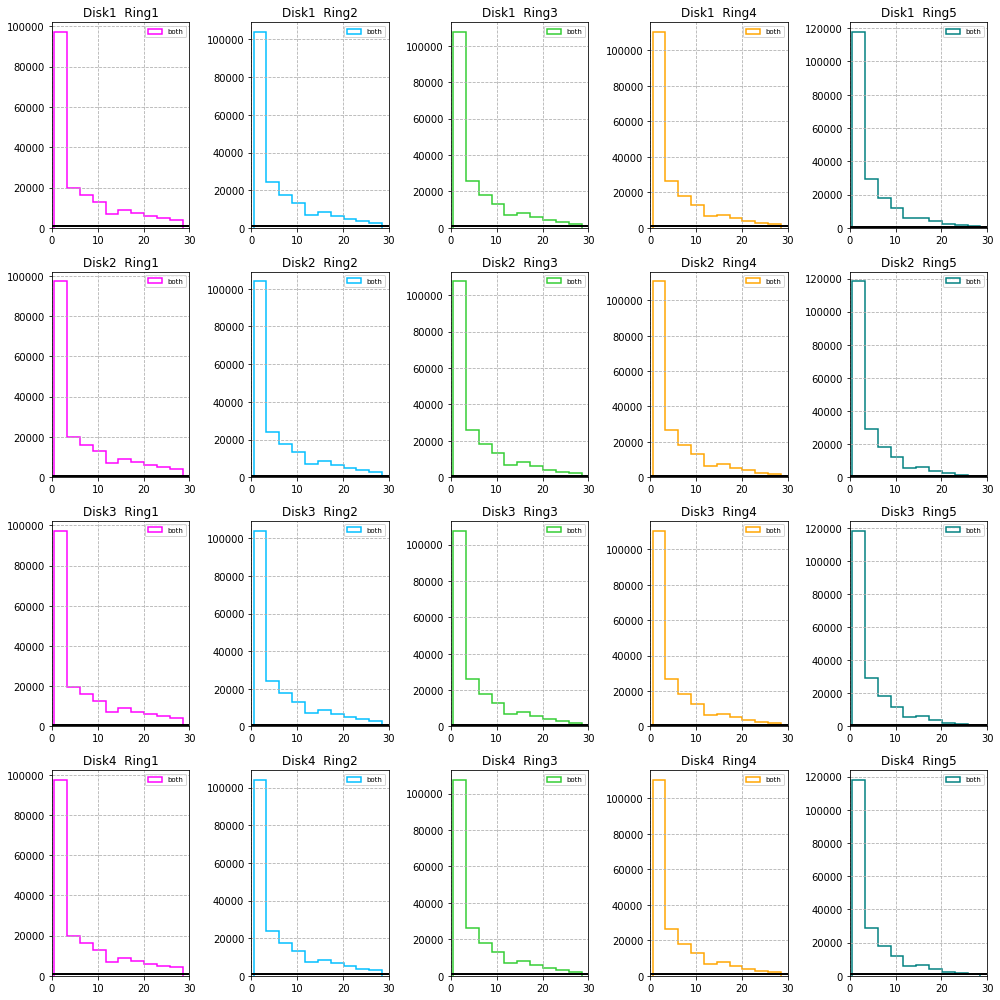

In [22]:


plt.figure(figsize=(14,14))
for i in range(1,diskNum):
    for d in disks: DiskRing[d]['Disk'+str(i)] = {} 
    means[PU_var]['Disk'+str(i)] = {}
    for j in range(1,ringNum):
        for d in disks: DiskRing[d]['Disk'+str(i)]['Ring'+str(j)] = []
        means[PU_var]['Disk'+str(i)]['Ring'+str(j)] = None
        
        yplus  = [hists[var]['Number of clusters for Disk ' +str(i)].GetBinContent(j,ii) for ii in range(xlim[PU_var])]
        yminus = [hists[var]['Number of clusters for Disk -'+str(i)].GetBinContent(j,ii) for ii in range(xlim[PU_var])]
        y = [p+m for p,m in zip(yplus,yminus)]
        x = [hists[var]['Number of clusters for Disk -'+str(i)].ProjectionY().GetBinCenter(jj) for jj in range(xlim[PU_var])]
        for k in range(len(y)):
            for N in range(int(yplus[k])):
                DiskRing['plus']['Disk'+str(i)]['Ring'+str(j)].append(x[k])
            for N in range(int(yminus[k])):
                DiskRing['minus']['Disk'+str(i)]['Ring'+str(j)].append(x[k])
            for N in range(int(y[k])):
                DiskRing['both']['Disk'+str(i)]['Ring'+str(j)].append(x[k])

        plt.subplot(diskNum-1,ringNum-1,diskNum*(i-1)+j)
        entries, bin_edges, patches = plt.hist(DiskRing['both']['Disk'+str(i)]['Ring'+str(j)],
                histtype = 'step',
                linewidth = 1.5,
                color = colorsP[j-1],
                label = 'both',
                )
        plt.legend(prop = {'size':7})
        plt.grid(linestyle='--')
        ax = plt.gca()
        ax.set_xlim(0,xlim[PU_var])
        #ax.set_ylim(0,70)
        plt.title('Disk' + str(i) + '  Ring' + str(j))
        
        bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])
        param, cov_matrix = curve_fit(f, bin_middles, entries,
                                      p0=P0[PU_var],
                                      bounds = bound) 

        x_plot = np.linspace(0, xlim[PU_var], 1000)
        plt.plot(x_plot, f(x_plot, *param), 
                 color = 'k',#colorsP[j-1],
                 linestyle='-', 
                 lw=2)
        
        means[PU_var]['Disk'+str(i)]['Ring'+str(j)] = param[3]
plt.tight_layout()        
plt.show()



KeyError: 'Disk1'

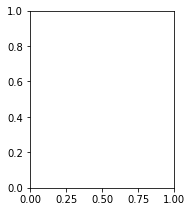

In [23]:
plt.figure(figsize=(15,15))
for i in range(1,diskNum):
    for j in range(1,ringNum):
        plt.subplot(diskNum-1,ringNum-1,diskNum*(i-1)+j)
        count = np.array([means[pu]['Disk'+str(i)]['Ring'+str(j)] for pu in PU])
        plt.plot(PU,count,color=colorsP[j-1],marker='o',linestyle='')
        plt.title('Disk '+str(i) +' Ring '+str(j))
        ax = plt.gca()
        ax.set_xlabel('PU')
        plt.grid(linestyle='--')